# Import 

In [1]:
import pandas as pd
from rdkit import Chem, DataStructs
from rdkit.Chem import AllChem
import numpy as np
from tqdm import tqdm

In [26]:
#df_phenom = pd.read_parquet('/home/maxime/data/jump_embeddings/metadata_dinov2_g.parquet')
df_phenom = pd.read_parquet('/projects/synsight/data/jump_embeddings/wells_embeddings/openphenom/metadata_openphenom.parquet')

df_jump = df_phenom[["Metadata_JCP2022", "Metadata_InChI"]].drop_duplicates().reset_index()

In [4]:
mg = AllChem.GetMorganGenerator(radius=2, fpSize=2048, includeChirality=False)

In [16]:
def inchi_to_fp(inchi):
    """Convert InChI string to RDKit Morgan fingerprint."""
    mol = Chem.MolFromInchi(inchi)
    if mol:
        return mg.GetFingerprint(mol)
    return None
 
def smiles_to_fp(smiles):
    """Convert SMILES to RDKit fingerprint."""
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        return mg.GetFingerprint(mol)
    return None

def bulk_tanimoto_similarity(query_fp, list_of_fps):
    """Compute Tanimoto similarity efficiently in bulk."""
    list_of_fps = list(list_of_fps)  # Ensure it's a Python list
    return DataStructs.BulkTanimotoSimilarity(query_fp, list_of_fps)

def compute_similarity(query, list_of_fps_jump, query_type='smiles'):
    """Compute Tanimoto similarity between a query InChI and a list of InChIs."""
    
    if  query_type == 'smiles':
        query_fp = smiles_to_fp(query)
    else:
        query_fp = inchi_to_fp(query)
    if query_fp is None:
        raise ValueError("Invalid query")
    
    list_of_fps = [fp for fp in list_of_fps_jump if fp is not None]  # Filter out None values
    
    return bulk_tanimoto_similarity(query_fp, list_of_fps)

In [27]:
list_of_fps_jump = [inchi_to_fp(inchi) for inchi in tqdm(df_jump['Metadata_InChI'].to_list())]
df_jump['Fps'] = list_of_fps_jump
df_jump.dropna(subset='Fps', inplace=True)

  2%|▏         | 2420/112480 [00:02<01:06, 1661.01it/s][16:24:09] Explicit valence for atom # 26 P, 6, is greater than permitted
[16:24:09] ERROR: Explicit valence for atom # 26 P, 6, is greater than permitted

  3%|▎         | 3106/112480 [00:02<01:04, 1688.28it/s][16:24:09] Explicit valence for atom # 32 P, 6, is greater than permitted
[16:24:09] ERROR: Explicit valence for atom # 32 P, 6, is greater than permitted

  5%|▍         | 5357/112480 [00:03<01:01, 1744.72it/s][16:24:10] Explicit valence for atom # 13 P, 6, is greater than permitted
[16:24:10] ERROR: Explicit valence for atom # 13 P, 6, is greater than permitted

[16:24:10] Explicit valence for atom # 25 P, 6, is greater than permitted
[16:24:10] ERROR: Explicit valence for atom # 25 P, 6, is greater than permitted

  7%|▋         | 7789/112480 [00:05<01:01, 1710.99it/s][16:24:12] Explicit valence for atom # 17 P, 6, is greater than permitted
[16:24:12] ERROR: Explicit valence for atom # 17 P, 6, is greater than permitted



# Import mols from d4_rescore

In [11]:
df_d4 = pd.read_csv('/projects/synsight/repos/phenoseeker/data/d4_rescore.csv', sep='\t')

In [12]:
df_d4

,SMILES,ZINC ID,Inhibition (%) at 10uM
0,Cc1ccc(C[C@@H](CO)N[C@@H](C)CCc2ccccc2[N+](=O)...,ZINC000191583186,82.48
1,C[C@H](C(=O)Nc1cc([N+](=O)[O-])ccc1Cl)N(C)C[C@...,ZINC000159533726,2.68
2,C[C@@H](NC[C@](C)(O)c1ccccc1)c1cn(-c2ccccc2)nn1,ZINC000151228439,17.50
3,C[C@H](Nc1cc(-n2cccn2)nc(N)n1)[C@H](c1ccccc1)N...,ZINC000291023493,-10.33
4,COC(=O)C[C@H]1CSCCN1Cc1cn(-c2cccc(C)c2)nc1C,ZINC000593577820,11.48
...,...,...,...
544,C[C@H]1SCC[C@@H]1NC(=O)C1C[C@H]2CCC[C@@H](C1)C2=O,ZINC000648691433,9.42
545,O=C(N=c1[nH]nc2n1CCCC2)c1ccc(-n2ccnc2O)cc1,ZINC000651692099,-6.16
546,Cn1c(O)ncc(C(=O)NCc2nnn(C(C)(C)C)n2)c1=O,ZINC000655250990,13.23
547,CC(C)(C)n1cc(CSc2nc(N)nc(N)n2)nn1,ZINC000657225886,-6.87


<Axes: >

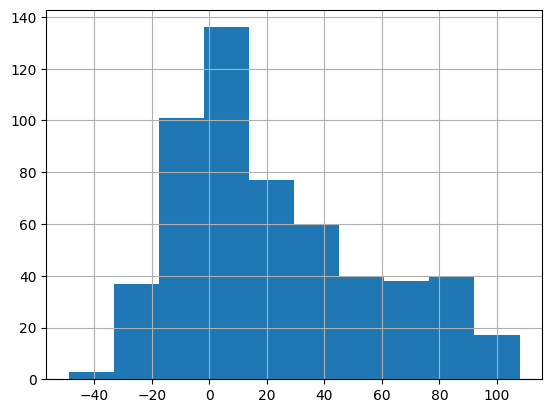

In [19]:
df_d4['Inhibition (%) at 10uM'].hist()

# Explore

In [23]:
df_jump

,index,Metadata_JCP2022,Metadata_InChI,Fps
0,0,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,1,JCP2022_064022,InChI=1S/C23H25ClF3N5O/c1-13(2)28-23(33)31-8-7...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,2,JCP2022_041762,InChI=1S/C17H19NO4S2/c1-21-15-9-8-13(12-16(15)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,3,JCP2022_076391,InChI=1S/C20H17N5O6/c1-31-16-5-3-2-4-12(16)6-9...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,4,JCP2022_025880,InChI=1S/C6H9N3O2/c1-2-3-4(10)8-6(7)9-5(3)11/h...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
...,...,...,...,...
112475,694061,JCP2022_086433,InChI=1S/C25H29N3O4/c1-17(2)32-21-11-7-18(8-12...,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
112476,703848,JCP2022_082069,InChI=1S/C16H23N3O2/c1-21-15-10-19(11-15)14-8-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
112477,705803,JCP2022_090496,InChI=1S/C25H25FN4O3/c26-20-8-6-18(7-9-20)16-2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ..."
112478,711042,JCP2022_102007,InChI=1S/C18H21ClN4O2/c19-14-6-3-7-15(10-14)22...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [28]:
# Dictionnaire pour stocker les résultats
similarity_results = {}
list_of_fps_jump = df_jump['Fps'].to_list()
for index, row in tqdm(df_d4.iterrows(), total=df_d4.shape[0]):
    query_inchi = row['SMILES']  # Assumer que 'SMILES' correspond à la structure chimique
    similarities = compute_similarity(query_inchi, list_of_fps_jump)  # Calcul des similarités
    
    # Stocker temporairement les similarités sous forme de colonne
    similarity_results[f'TC_to_{row["ZINC ID"]}'] = similarities

# Conversion du dictionnaire en DataFrame
similarity_df = pd.DataFrame(similarity_results)
similarity_df.index = df_jump.index  # Assurer l'alignement des index

# Fusionner le tout avec df_jump
final_df = pd.concat([df_jump, similarity_df], axis=1)

100%|██████████| 549/549 [00:16<00:00, 32.90it/s]


In [29]:
final_df

,index,Metadata_JCP2022,Metadata_InChI,Fps,TC_to_ZINC000191583186,TC_to_ZINC000159533726,TC_to_ZINC000151228439,TC_to_ZINC000291023493,TC_to_ZINC000593577820,TC_to_ZINC000642686331,...,TC_to_ZINC000616783624,TC_to_ZINC000617992931,TC_to_ZINC000624061454,TC_to_ZINC000632070629,TC_to_ZINC000647880816,TC_to_ZINC000648691433,TC_to_ZINC000651692099,TC_to_ZINC000655250990,TC_to_ZINC000657225886,TC_to_ZINC000664448457
0,0,JCP2022_033924,InChI=1S/C2H6OS/c1-4(2)3/h1-2H3,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.040816,0.035088,0.021739,0.019231,0.033333,0.000000,...,0.055556,0.041667,0.042553,0.035714,0.000000,0.050000,0.018519,0.041667,0.025641,0.055556
1,1,JCP2022_064022,InChI=1S/C23H25ClF3N5O/c1-13(2)28-23(33)31-8-7...,"[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.091837,0.138614,0.107527,0.101010,0.102804,0.128713,...,0.105882,0.092784,0.082474,0.117647,0.083333,0.076923,0.088235,0.070707,0.066667,0.160494
2,2,JCP2022_041762,InChI=1S/C17H19NO4S2/c1-21-15-9-8-13(12-16(15)...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.101266,0.091954,0.121622,0.126582,0.209877,0.146341,...,0.156250,0.116883,0.103896,0.146341,0.135135,0.114286,0.096386,0.075000,0.070423,0.138462
3,3,JCP2022_076391,InChI=1S/C20H17N5O6/c1-31-16-5-3-2-4-12(16)6-9...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.150538,0.185567,0.084211,0.079208,0.123810,0.055556,...,0.093023,0.081633,0.071429,0.075472,0.094737,0.065217,0.088235,0.081633,0.032258,0.105882
4,4,JCP2022_025880,InChI=1S/C6H9N3O2/c1-2-3-4(10)8-6(7)9-5(3)11/h...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.061538,0.054795,0.083333,0.059701,0.066667,0.041096,...,0.076923,0.046154,0.063492,0.055556,0.064516,0.052632,0.073529,0.133333,0.094340,0.056604
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
112475,694061,JCP2022_086433,InChI=1S/C25H29N3O4/c1-17(2)32-21-11-7-18(8-12...,"[0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.134831,0.172043,0.114943,0.084211,0.166667,0.136842,...,0.173333,0.111111,0.125000,0.125000,0.065217,0.135802,0.141304,0.162791,0.058824,0.173333
112476,703848,JCP2022_082069,InChI=1S/C16H23N3O2/c1-21-15-10-19(11-15)14-8-...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.090909,0.135802,0.126761,0.088608,0.144578,0.096386,...,0.183333,0.136986,0.108108,0.096386,0.109589,0.119403,0.142857,0.077922,0.057971,0.145161
112477,705803,JCP2022_090496,InChI=1S/C25H25FN4O3/c26-20-8-6-18(7-9-20)16-2...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, ...",0.131868,0.077670,0.125000,0.105263,0.117647,0.122449,...,0.125000,0.120879,0.074468,0.182796,0.162791,0.056180,0.150538,0.133333,0.082353,0.184211
112478,711042,JCP2022_102007,InChI=1S/C18H21ClN4O2/c19-14-6-3-7-15(10-14)22...,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...",0.089888,0.166667,0.134146,0.112360,0.161290,0.168539,...,0.200000,0.090909,0.117647,0.118280,0.160494,0.142857,0.134831,0.129412,0.061728,0.120000


In [35]:
tc_columns = [col for col in final_df.columns if col.startswith("TC_to_")]

# Trouver la similarité maximale et l'identifiant correspondant
df_d4["Max_TC"] = final_df[tc_columns].max(axis=1)  # Valeur TC max
df_d4["Best_JCPID"] = final_df[tc_columns].idxmax(axis=1).str.replace("TC_to_", "")  # JCPID associé


<Axes: >

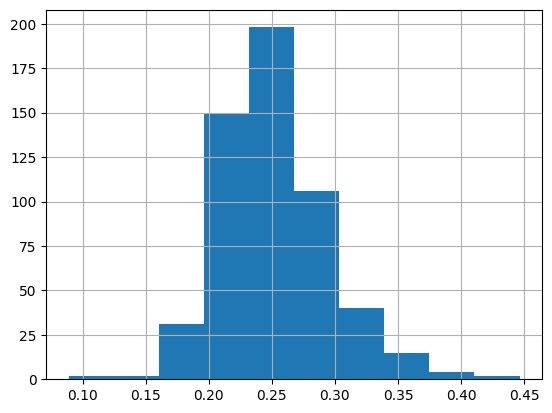

In [37]:
df_d4["Max_TC"].hist()